# Inference Image

모듈 로드

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import common libraries
import numpy as np
import os, cv2, time

from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor

모델 로드

In [2]:

# Define paths and parameters
config_file_path = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
num_classes = 4  # Example: 2 custom classes + 1 background
device = "cuda"  # Or "cpu"

# Load configuration and create predictor
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(config_file_path))
cfg.MODEL.WEIGHTS = os.path.join("/home/elicer/detectron2_custom_dataset/output_yolo2/segmentation/model_final.pth")  # Path to your trained model
cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes  # Set the number of classes (including background)
cfg.MODEL.DEVICE = device
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # Custom threshold

# Register custom dataset
DatasetCatalog.register("my_custom_dataset", lambda: get_custom_dataset_dicts("/home/elicer/dataset/labels/val/10000002.json"))
MetadataCatalog.get("my_custom_dataset").thing_classes = ["Parking Space", "Driveable Space", "car", "person"]

predictor = DefaultPredictor(cfg)



[09/06 17:41:05 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/elicer/detectron2_custom_dataset/output_yolo2/segmentation/model_final.pth ...


/home/elicer/anaconda3/envs/jyj/lib/python3.12/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location

In [3]:
# Define paths for input and output images
input_image_path = "/home/elicer/detectron2_custom_dataset/inference/test_dataset"
output_image_path = "/home/elicer/detectron2_custom_dataset/inference/test_dataset_yolo2"


In [4]:
image_files = [os.path.join(input_image_path, f) for f in os.listdir(input_image_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

for s in image_files:
    img = cv2.imread(s)  # s는 문자열(파일 경로)입니다.

    # Perform prediction on the image
    outputs = predictor(img)

    # Visualize the output in color
    v = Visualizer(
        img[:, :, ::-1],
        metadata=MetadataCatalog.get("my_custom_dataset"),  # Make sure this matches your custom dataset
        scale=1.0,
        instance_mode=ColorMode.IMAGE  # Keep the image in full color
    )

    # Draw instance predictions on the image
    out_image = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Save the output image
    output_file_path = os.path.join(output_image_path, os.path.basename(s))  # 저장할 파일 경로 생성
    cv2.imwrite(output_file_path, out_image.get_image()[:, :, ::-1])

/home/elicer/anaconda3/envs/jyj/lib/python3.12/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


추론 이미지 결과

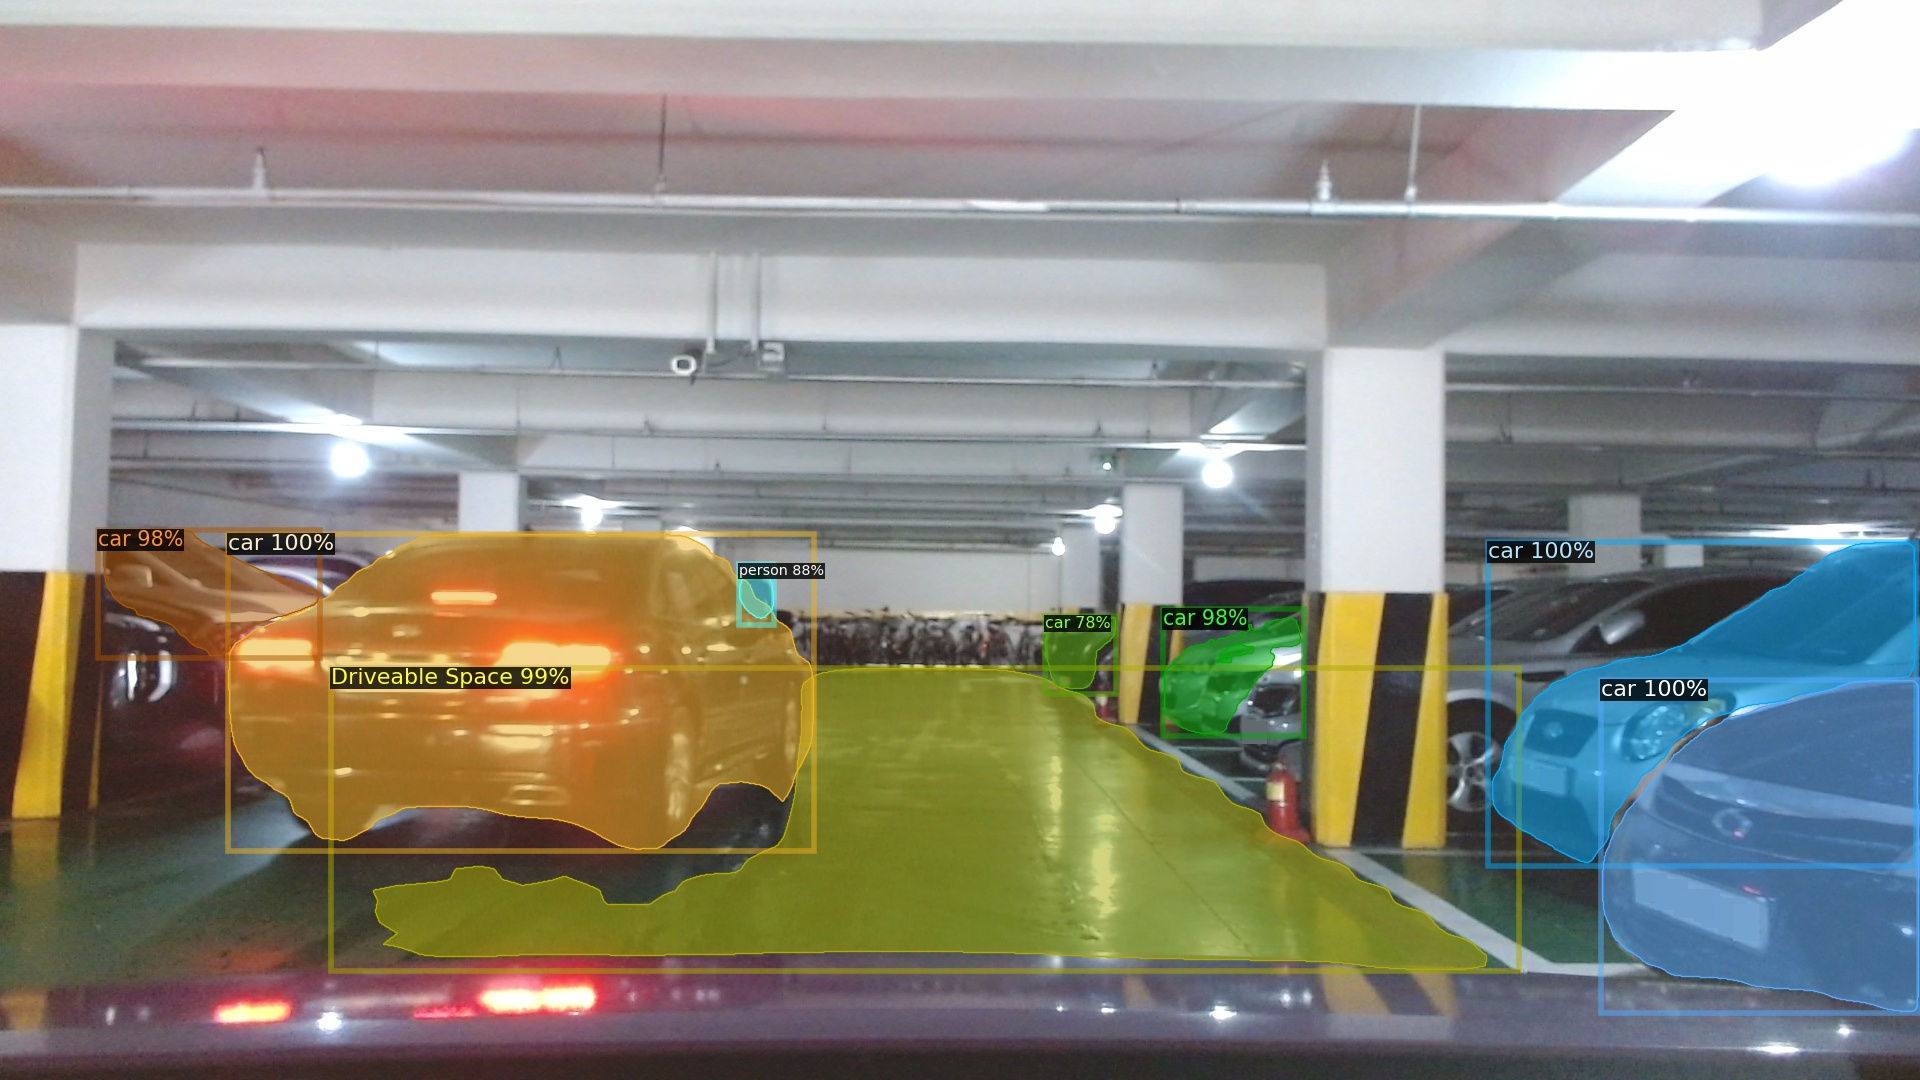